# EDS 296 Final Mini Project
#### Authors: Liz Peterson & Brooke Grazda
#### Date: 6-10-25

![amazon-river-basin.jpg](amazon-river-basin.jpg)

### Introduction

The region of interest we are choosing for this assignment is Brazil, home of the Amazon. The Amazon Rainforest is located in the northwestern region of Brazil, with 60% of its coverage in this country. Brazil is home to many culturally and intrinsically rich cultures and species, surrounded by lush and tropical habitats. Brazil is the 5th largest nation in the world, spanning 10,492 mi in South America. It touches every country in South America, except for Ecuador and Chile. This country is also home to a Wonder of the World, Christ the Redeemer located in Rio de Janeiro. Every year, millions flock to this large tropical city in the southeastern end of Brazil. Because of its large area and diverse ecosystems, Brazil's climate spans from equatorial humid climates in the south to semi arid climates in the north east. 


In the [2022 election](https://www.npr.org/2022/10/30/1132561987/brazil-election-lula-da-silva), Luiz Inácio Lula da Silva beat the incumbent president, Bolsonaro, who led a far right, authoritarian presidency. This was a huge win for same sex marriage, abortion, affirmative action, indigenous rights, and environmental protections as Bolsonaro opposed each of these topics. During Bolsonaro's presidency, he rolled back on indigenous rights and facilitated deforestation in the Amazon. Since the election, President Lula de Silva has promoted many fiscal policies and social welfare programs that have led to an increase in national GDP. Much of the environmental damages in the Amazon from Bolsonaro are being reversed under Lula. Despite curbing Bolsonaro's deforestation of the Amazon, Lula has not supported legislation to phase out fossil fuels in the country. 


Understanding the geopolitical context of the region, Brazil becomes a hotspot for extreme climate events to occur, such as floods, droughts, and heatwaves. With 2024 being the hottest year on record, researchers were able to study the 32 year period from 1991 to 2023. From this [data](https://news.mongabay.com/2025/02/brazil-has-seen-a-460-increase-in-climate-related-disasters-since-the-1990s/), it was found that 64,280 climate-related disasters occured in 92% of Brazilian municipalities. Half of the disasters recorded were droughts, while flooding, torrential rains and high water levels composed 27% of the total. Storms composed 19%. More than 219 million people were affected by death, displacement, homelessness and illness. 78 million of these people were affected during the last four years. The average annual economic losses from these climate related disasters since 2020 is $8.14 billion, which is more than double the average annual loss from the previous year. This ecologically sensitive region supports millions of species and communities whose livelihoods depend entirely on the surrounding ecosystem. As climate change accelerates environmental degradation, humans will inevitably bear the mounting costs of diminished ecosystem services.

![<img src="brazil-climate1.jpeg" width="200">](brazil-climate1.jpeg)
![map](map-brazil.jpeg)

### Metrics Definition

We will be doing a correlation and regression analysis of soil moisture content (mrso) and air temperature (tas). 

### Data I/O

In [46]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import intake
import s3fs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats
import pandas as pd

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [11]:
# Specify search terms to query catalog 
# activity_id: which downscaling technique do you want?
activity_id = ["CMIP"]

# experiment_id: which historical/future scenario do you want?
experiment_id = ["historical"]

# table_id: which part of the Earth system/time resolution do you want?
table_id = ['Amon', 'Lmon']

# source_id: which model do you want?
source_id = ["CESM2"]

# variable_id: which variable do you want?
variable_id = ["tas", "mrso"]

In [12]:
# Search through catalog, store results
cesm_res = catalog.search(activity_id=activity_id, experiment_id=experiment_id,
                         source_id=source_id, table_id=table_id, variable_id=variable_id)

# Create a data frame
cesm_df = cesm_res.df

# Look at results
display(cesm_df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r4i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r3i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
5,CMIP,NCAR,CESM2,historical,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
6,CMIP,NCAR,CESM2,historical,r6i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
7,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
8,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
9,CMIP,NCAR,CESM2,historical,r5i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308


In [15]:
# Look just at the tos entries
cesm_tas = cesm_df[cesm_df.variable_id == 'tas']

cesm_tas.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
1,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
7,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
8,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308


In [23]:
print(cesm_tas['zstore'][2])

s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historical/r6i1p1f1/Amon/tas/gn/v20190308/


In [27]:
# Open first CESM tas dataset to look at it
test1 = xr.open_zarr(cesm_tas['zstore'].iloc[0], storage_options={'anon': True})
print(test1)

<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  182500.0
    case_id:                18
    ...                     ...
    variable_id

In [28]:
# Open second CESM tas dataset to look at it
test2 = xr.open_zarr(cesm_tas['zstore'].iloc[1], storage_options={'anon': True})
print(test2)

<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  262800.0
    case_id:                20
    ...                     ...
    variable_id

In [29]:
# Search through catalog, store results for tas
cesm_res_tas = catalog.search(activity_id=activity_id, experiment_id=experiment_id,
                         source_id=source_id, table_id=table_id, 
                         variable_id='tas', grid_label='gn')

# Recreate the data frame
cesm_tas_df = cesm_res_tas.df

# Display the data frame
display(cesm_tas_df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
5,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
6,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
7,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
8,CMIP,NCAR,CESM2,historical,r7i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
9,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313


In [30]:
# Search through catalog, store results for soil moisture content
cesm_res_mrso = catalog.search(activity_id=activity_id, experiment_id=experiment_id,
                         source_id=source_id, table_id=table_id, 
                         variable_id='mrso')

# Recreate the data frame
cesm_mrso_df = cesm_res_mrso.df

# Display the data frame
display(cesm_mrso_df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r4i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r3i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r6i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r5i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
5,CMIP,NCAR,CESM2,historical,r2i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
6,CMIP,NCAR,CESM2,historical,r9i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
7,CMIP,NCAR,CESM2,historical,r7i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
8,CMIP,NCAR,CESM2,historical,r8i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
9,CMIP,NCAR,CESM2,historical,r10i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313


There are the same number of entries for `tas` and `mrso` now, so let's start getting the data I/O sorted out.

Next step is to find common member IDs.

In [31]:
# Define list of ensemble members
# tos
mems_tas = cesm_tas_df.member_id.unique()

# pr
mems_mrso = cesm_mrso_df.member_id.unique()

# Find the ones each list has in common
common_mems = list(set(mems_tas) & set(mems_mrso))

# Print
print(common_mems)

['r2i1p1f1', 'r7i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r1i1p1f1', 'r8i1p1f1', 'r10i1p1f1', 'r9i1p1f1', 'r6i1p1f1', 'r5i1p1f1', 'r11i1p1f1']


Next step is to loop through all of the members for which tas and mrso data are available, find their location in the appropriate data frame, and add to an output list. 

In [32]:
# Define empty lists for output data
cesm2_tempdata = []
cesm2_mrsodata = []

# Loop over all common ensemble members; grab both temperature
# and precip for each member
for mem in range(len(common_mems)):
    print(common_mems[mem])

    # Extract member of interest
    mrso_cesm2df = cesm_mrso_df[(cesm_mrso_df["member_id"] == common_mems[mem])]
    tas_cesm2df = cesm_tas_df[(cesm_tas_df["member_id"] == common_mems[mem])]
    
    # Store data as xarray
    hist_mrso = xr.open_zarr(mrso_cesm2df['zstore'].iloc[0], storage_options={'anon': True}).load()
    hist_tas = xr.open_zarr(tas_cesm2df['zstore'].iloc[0], storage_options={'anon': True}).load()
    
    # Reassign time for all entries aside from the first one
    if mem == 0:
        common_time = hist_tas.time
    else:
        hist_tas['time'] = common_time    
        
    # Add to list
    cesm2_tempdata.append(hist_tas)
    cesm2_mrsodata.append(hist_mrso)

r2i1p1f1
r7i1p1f1
r3i1p1f1
r4i1p1f1
r1i1p1f1
r8i1p1f1
r10i1p1f1
r9i1p1f1
r6i1p1f1
r5i1p1f1
r11i1p1f1


Now we follow our standard steps of concatenating the data into xarray objects - one for each variable - and adding the member names as values in the new "member" dimension!

In [33]:
# Concatenate the list into a single xarray object
cesm2_tempdata = xr.concat(cesm2_tempdata, dim="member")
cesm2_mrsodata = xr.concat(cesm2_mrsodata, dim="member")

# Store the actual member information as values of the new dimension
cesm2_tempdata = cesm2_tempdata.assign_coords(member=("member", common_mems))
cesm2_mrsodata = cesm2_mrsodata.assign_coords(member=("member", common_mems))

# Reformat time dimension for concatenated array
cesm2_tempdata['time'] = cesm2_tempdata.time.astype('datetime64[ns]')

### Metrics Computation

## **Calculate Regionally Averaged Time Series**

Here we need to step back a little and remember what our goal is. We're aiming to see how soil moisture in Brazil is related to air temperature in EVERY OTHER place (here, the rest of the world). That means we have one more thing to do before we can calculate the correlation/regression maps: namely, to actually make time series for our _target region_ of Brazil. Luckily, we already know how to do this from previous tutorials!

The code block below specifies a lat/lon region and performs the regional average from the `cesm2_tempdata` xarray variable we already defined. (note: here I'm not going to bother with area weighting because the region is fairly small and I want to make the code more readable)

In [49]:
# Specify rough lat/lon bounds for Brazil
lat_min, lat_max = -33.7683777809, 5.24448639569
lon_min, lon_max = -73.9872354804, -34.7299934555

lon_min_360 = lon_min % 360  # -73.9872 % 360 = 286.0128
lon_max_360 = lon_max % 360  # -34.7299 % 360 = 325.2701


# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
mask_lat = (cesm2_mrsodata.lat >= lat_min) & (cesm2_mrsodata.lat <= lat_max)
mask_lon = (cesm2_mrsodata.lon >= lon_min_360) | (cesm2_mrsodata.lon <= lon_max_360)

# Find points where the mask value is True, drop all other points
cesm2_brazil = cesm2_mrsodata.where(mask_lat & mask_lon, drop=True)

# Average over the lat and lon dimensions
cesm2_brazil = cesm2_brazil.mean(dim="lat").mean(dim="lon")

### **Calculate anomalies**

We also want to do one more thing to the time series: that is, to calculate the _anomaly_ by removing the _climatological average_ from the data. We'll do this using the xarray `groupby` command.

In [50]:
# Calculate seasonal average
cesm2_brazil_clim = cesm2_brazil.groupby('time.month').mean('time')
# Print output to see what it looks like
print(cesm2_brazil_clim)

<xarray.Dataset>
Dimensions:  (month: 12, member: 11)
Coordinates:
  * member   (member) <U9 'r2i1p1f1' 'r7i1p1f1' ... 'r5i1p1f1' 'r11i1p1f1'
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mrso     (month, member) float32 1.948e+03 1.943e+03 ... 1.924e+03 1.93e+03


In [51]:
# Remove seasonal mean to get the anomaly
cesm2_brazil_anom = cesm2_brazil.groupby('time.month') - cesm2_brazil_clim

### Visualizations

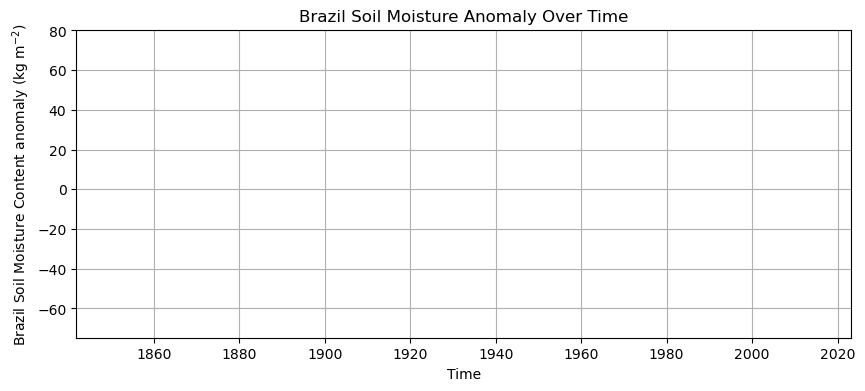

In [52]:
# Convert time to pandas DatetimeIndex (if needed)
# Convert cftime to Python datetime objects
time = [pd.Timestamp(t.isoformat()) for t in cesm2_brazil_anom.time.values]

# Select first member
soil_moisture = cesm2_brazil_anom.mrso.isel(member=0)

plt.figure(figsize=(10, 4))
plt.plot(time, soil_moisture)
plt.xlabel('Time')
plt.ylabel('Brazil Soil Moisture Content anomaly (kg m$^{-2}$)')
plt.title('Brazil Soil Moisture Anomaly Over Time')
plt.grid(True)
plt.show()

In [54]:
print(soil_moisture)

<xarray.DataArray 'mrso' (time: 3960)>
array([-25.185791,        nan, -25.740112, ...,        nan,  22.778687,
              nan], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00...
    member   <U9 'r2i1p1f1'
    month    (time) int64 1 1 2 2 3 3 4 4 5 5 6 ... 7 8 8 9 9 10 10 11 11 12 12


In [56]:
print("Total:", soil_moisture.size)

Total: 3960


In [57]:
print("Valid:", soil_moisture.notnull().sum().item())

Valid: 1980


In [58]:
print("Missing:", soil_moisture.isnull().sum().item())

Missing: 1980


In [59]:
print(soil_moisture.time.values[:12])

[cftime.DatetimeNoLeap(1850, 1, 15, 11, 45, 0, 13, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 1, 15, 11, 45, 0, 26, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 13, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 13, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 4, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 4, 15, 0, 0, 0, 13, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 5, 15, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 5, 15, 12, 0, 0, 13, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 6, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 6, 15, 0, 0, 0, 13, has_year_zero=True)]


In [61]:
print(soil_moisture[::2])  # Check every other time point
print(soil_moisture[1::2])

<xarray.DataArray 'mrso' (time: 1980)>
array([-25.185791, -25.740112, -38.03882 , ...,  19.611572,  17.395752,
        22.778687], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00
    member   <U9 'r2i1p1f1'
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
<xarray.DataArray 'mrso' (time: 1980)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 11:45:00.000026 ... 2014-12-15 12:00:00...
    member   <U9 'r2i1p1f1'
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12


### Conclusions